In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

### Import and store the data in a data frame

In [117]:
airq_df = pd.read_csv("airq402.csv")
airq_df.head(5)

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare2,Low price airline,market share2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [118]:
airq_df.isnull()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare2,Low price airline,market share2,price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [119]:
airq_df.shape

(1000, 11)

In [120]:
airq_df.dtypes

City1                         object
City2                         object
Average Fare                 float64
Distance                       int64
Average weekly passengers    float64
market leading airline        object
market share                 float64
Average fare2                float64
Low price airline             object
market share2                float64
price                        float64
dtype: object

### Remove outliers from the data

In [121]:
airq_num_df = airq_df[['Average Fare','Distance','Average weekly passengers','market share','Average fare2','market share2','price']]

In [122]:
airq_num_df.head(5)

,Average Fare,Distance,Average weekly passengers,market share,Average fare2,market share2,price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42


In [123]:
Q1 = airq_num_df.quantile(0.25)
Q3 = airq_num_df.quantile(0.75)
IQR = Q3 - Q1

In [124]:
# identify outliers
print((airq_num_df < (Q1 - 1.5 * IQR)) |(airq_num_df > (Q3 + 1.5 * IQR)))

     Average Fare  Distance  Average weekly passengers  market share  \
0           False     False                      False         False   
1           False     False                      False         False   
2           False     False                      False         False   
3           False     False                      False         False   
4           False     False                      False         False   
5           False     False                      False         False   
6           False     False                      False         False   
7           False     False                      False         False   
8           False     False                      False         False   
9           False     False                      False         False   
10          False     False                      False         False   
11          False     False                      False         False   
12          False     False                      False         F

In [125]:
# remove outliers
airq_num_df_out = airq_num_df[~((airq_num_df < (Q1 - 1.5 * IQR)) |(airq_num_df > (Q3 + 1.5 * IQR))).any(axis=1)]
airq_num_df_out.shape

(885, 7)

In [126]:
airq_char_df = airq_df[['City1','City2','market leading airline','Low price airline']]
airq_char_df.head(5)

,City1,City2,market leading airline,Low price airline
0,CAK,ATL,FL,FL
1,CAK,MCO,FL,DL
2,ALB,ATL,DL,CO
3,ALB,BWI,WN,WN
4,ALB,ORD,UA,WN


In [221]:
airq_df_concat = pd.concat([airq_char_df, airq_num_df_out], axis=1)
airq_df_concat

,City1,City2,market leading airline,Low price airline,Average Fare,Distance,Average weekly passengers,market share,Average fare2,market share2,price
0,CAK,ATL,FL,FL,114.47,528.0,424.56,70.19,111.03,70.19,111.03
1,CAK,MCO,FL,DL,122.47,860.0,276.84,75.10,123.09,17.23,118.94
2,ALB,ATL,DL,CO,214.42,852.0,215.76,78.89,223.98,2.77,167.12
3,ALB,BWI,WN,WN,69.40,288.0,606.84,96.97,68.86,96.97,68.86
4,ALB,ORD,UA,WN,158.13,723.0,313.04,39.79,161.36,15.34,145.42
5,ALB,FLL,WN,DL,135.17,1204.0,199.02,40.68,137.97,17.09,127.69
6,ALB,LAS,WN,WN,152.85,2237.0,237.17,59.94,148.59,59.94,148.59
7,ALB,LAX,DL,US,190.73,2467.0,191.95,17.89,205.06,16.59,174.00
8,ALB,MCO,WN,WN,129.35,1073.0,550.54,76.84,127.69,76.84,127.69
9,ALB,TPA,US,DL,134.17,1130.0,202.93,35.40,132.91,26.40,124.78


In [128]:
airq_df_final = airq_df_concat.dropna()
airq_df_final

,City1,City2,market leading airline,Low price airline,Average Fare,Distance,Average weekly passengers,market share,Average fare2,market share2,price
0,CAK,ATL,FL,FL,114.47,528.0,424.56,70.19,111.03,70.19,111.03
1,CAK,MCO,FL,DL,122.47,860.0,276.84,75.10,123.09,17.23,118.94
2,ALB,ATL,DL,CO,214.42,852.0,215.76,78.89,223.98,2.77,167.12
3,ALB,BWI,WN,WN,69.40,288.0,606.84,96.97,68.86,96.97,68.86
4,ALB,ORD,UA,WN,158.13,723.0,313.04,39.79,161.36,15.34,145.42
5,ALB,FLL,WN,DL,135.17,1204.0,199.02,40.68,137.97,17.09,127.69
6,ALB,LAS,WN,WN,152.85,2237.0,237.17,59.94,148.59,59.94,148.59
7,ALB,LAX,DL,US,190.73,2467.0,191.95,17.89,205.06,16.59,174.00
8,ALB,MCO,WN,WN,129.35,1073.0,550.54,76.84,127.69,76.84,127.69
9,ALB,TPA,US,DL,134.17,1130.0,202.93,35.40,132.91,26.40,124.78


In [129]:
# airq_df_final 
airq_dumdf = pd.get_dummies(data=airq_df_final, columns=['City1','City2','market leading airline','Low price airline'])
airq_dumdf

,Average Fare,Distance,Average weekly passengers,market share,Average fare2,market share2,price,City1_ABQ,City1_ACY,City1_ALB,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
0,114.47,528.0,424.56,70.19,111.03,70.19,111.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860.0,276.84,75.10,123.09,17.23,118.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852.0,215.76,78.89,223.98,2.77,167.12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288.0,606.84,96.97,68.86,96.97,68.86,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723.0,313.04,39.79,161.36,15.34,145.42,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,135.17,1204.0,199.02,40.68,137.97,17.09,127.69,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,152.85,2237.0,237.17,59.94,148.59,59.94,148.59,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7,190.73,2467.0,191.95,17.89,205.06,16.59,174.00,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8,129.35,1073.0,550.54,76.84,127.69,76.84,127.69,0,0,1,...,0,0,0,0,0,0,0,0,1,0
9,134.17,1130.0,202.93,35.40,132.91,26.40,124.78,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Treat “Average Fare” – 3rd Column as your Dependent Variable and Rest of the columns as Independent Variable

In [223]:
y = airq_dumdf['Average Fare']
X1 = airq_dumdf.drop('Average Fare',axis=1)

### Drop the independent variables which has less than 0.1 correlation with the dependent variable

In [244]:
airq_dumdf.corr()

,Average Fare,Distance,Average weekly passengers,market share,Average fare2,market share2,price,City1_ABQ,City1_ACY,City1_ALB,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
Average Fare,1.000000,0.522650,-0.197005,-0.207955,0.979713,-0.493555,0.840993,-0.009688,-0.048420,-0.024181,...,-0.026989,0.075832,-0.060200,0.042864,0.060881,0.005389,0.164161,0.157995,-0.362065,0.027139
Distance,0.522650,1.000000,-0.129632,-0.547952,0.489721,-0.361519,0.539894,-0.017235,-0.011850,0.032210,...,-0.023815,0.094495,0.031604,0.049474,0.054131,0.033720,-0.015153,-0.031277,-0.174988,-0.014706
Average weekly passengers,-0.197005,-0.129632,1.000000,0.021769,-0.163736,0.076176,-0.209018,-0.039172,-0.031993,-0.053817,...,-0.021966,0.044906,0.117982,-0.049631,0.077232,0.051728,-0.081984,-0.051629,0.083152,-0.015698
market share,-0.207955,-0.547952,0.021769,1.000000,-0.193382,0.281182,-0.314555,0.038515,0.129791,-0.023874,...,-0.009989,0.000728,0.004213,-0.081531,-0.001548,-0.079767,0.080960,0.055311,0.101218,-0.012991
Average fare2,0.979713,0.489721,-0.163736,-0.193382,1.000000,-0.519442,0.794157,-0.013779,-0.046805,-0.021137,...,-0.044124,0.079399,-0.066917,0.050242,0.078179,0.022745,0.168584,0.151201,-0.363476,0.025443
market share2,-0.493555,-0.361519,0.076176,0.281182,-0.519442,1.000000,-0.260912,0.046532,0.099101,0.016240,...,0.025400,-0.073537,0.099983,-0.061549,-0.075362,-0.038367,-0.120787,-0.071163,0.378108,0.047128
price,0.840993,0.539894,-0.209018,-0.314555,0.794157,-0.260912,1.000000,0.016146,-0.035091,-0.011780,...,-0.040291,0.104202,-0.053045,0.011265,-0.016871,-0.040212,0.098144,0.093087,-0.294986,0.066470
City1_ABQ,-0.009688,-0.017235,-0.039172,0.038515,-0.013779,0.046532,0.016146,1.000000,-0.009709,-0.013762,...,-0.004846,0.108663,-0.017593,-0.026521,-0.012866,-0.020761,-0.035631,-0.049671,0.070662,-0.008403
City1_ACY,-0.048420,-0.011850,-0.031993,0.129791,-0.046805,0.099101,-0.035091,-0.009709,1.000000,-0.006436,...,-0.002266,-0.015958,0.411838,-0.012402,-0.006016,-0.009709,-0.016663,-0.023228,-0.037466,-0.003930
City1_ALB,-0.024181,0.032210,-0.053817,-0.023874,-0.021137,0.016240,-0.011780,-0.013762,-0.006436,1.000000,...,-0.003212,-0.022619,-0.011662,-0.017580,-0.008528,-0.013762,-0.023618,0.005823,0.059332,-0.005570


In [245]:
corr = airq_dumdf.corr()

#using absolute value so that the -ve sign does not affect the selection criteria
corr_abs = corr.abs()

corr_abs_sel = corr_abs[corr_abs.loc['Average Fare'] < 0.1]
cols_to_drop = list(corr_abs_sel.index.values)

In [246]:
X = X1.drop(cols_to_drop,axis=1)
X

,Distance,Average weekly passengers,market share,Average fare2,market share2,price,City1_BOI,City1_BOS,City1_CLT,City1_DFW,...,market leading airline_FL,market leading airline_NW,market leading airline_UA,market leading airline_WN,Low price airline_AA,Low price airline_CO,Low price airline_FL,Low price airline_UA,Low price airline_US,Low price airline_WN
0,528.0,424.56,70.19,111.03,70.19,111.03,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,860.0,276.84,75.10,123.09,17.23,118.94,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,852.0,215.76,78.89,223.98,2.77,167.12,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,288.0,606.84,96.97,68.86,96.97,68.86,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,723.0,313.04,39.79,161.36,15.34,145.42,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,1204.0,199.02,40.68,137.97,17.09,127.69,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,2237.0,237.17,59.94,148.59,59.94,148.59,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7,2467.0,191.95,17.89,205.06,16.59,174.00,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,1073.0,550.54,76.84,127.69,76.84,127.69,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9,1130.0,202.93,35.40,132.91,26.40,124.78,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create scatter Plot of Independent Variable vs Dependent Variable

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


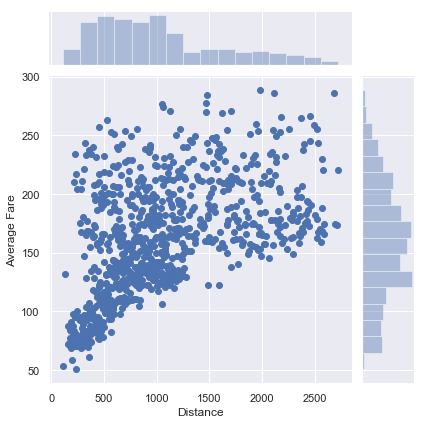

In [228]:
sns.jointplot(airq_df_final['Distance'], airq_df_final['Average Fare'])

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


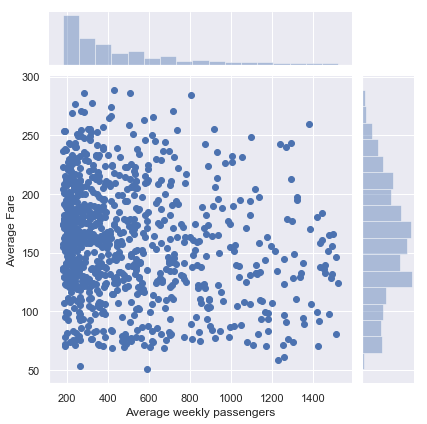

In [229]:
sns.jointplot(airq_df_final['Average weekly passengers'], airq_df_final['Average Fare'])

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


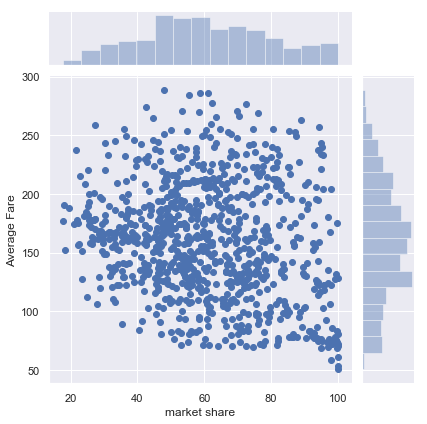

In [230]:
sns.jointplot(airq_df_final['market share'], airq_df_final['Average Fare'])

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


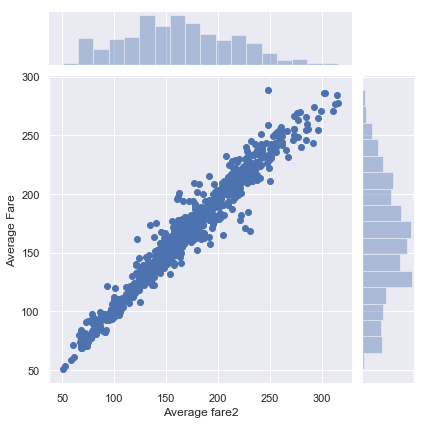

In [231]:
sns.jointplot(airq_df_final['Average fare2'], airq_df_final['Average Fare'])

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


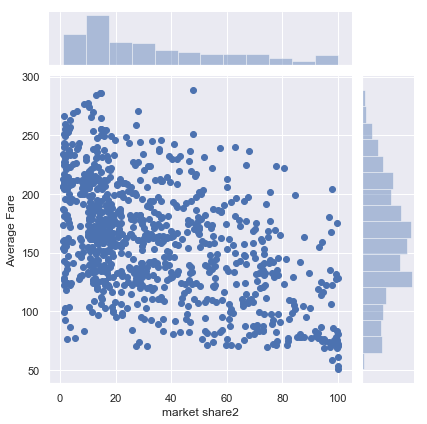

In [232]:
sns.jointplot(airq_df_final['market share2'], airq_df_final['Average Fare'])

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


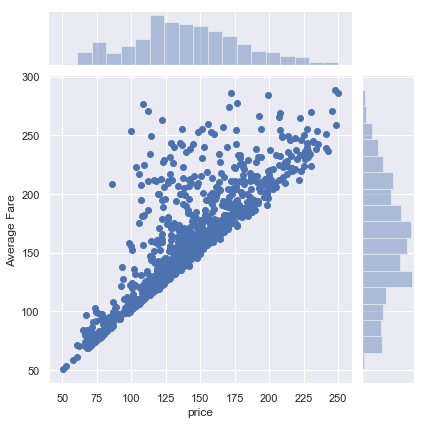

In [233]:
sns.jointplot(airq_df_final['price'], airq_df_final['Average Fare'])

### Divide the data set into training and test data set and build a Multiple Linear Regression model

In [234]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [235]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(708, 32) (708,)
(177, 32) (177,)


In [236]:
# training the model
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [237]:
results = lm.fit(X,y)

In [238]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Average Fare   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1031.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        19:23:40   Log-Likelihood:                -3060.7
No. Observations:                 885   AIC:                             6187.
Df Residuals:                     852   BIC:                             6345.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         8.2670      2.062      4.010      0.000       4.220      12.314
Distance                      0.0026      0.001      4.152      0.000       0.001       0.004
Average weekly passengers    -0.0029      0.001     -3.269      0.001      -0.005      -0.001
market share                  0.0553      0.018      3.098      0.002       0.020       0.090
Average fare2                 0.7400      0.012     60.421      0.000       0.716       0.764
market share2                -0.0303      0.014     -2.231      0.026      -0.057      -0.004
price                         0.2056      0.014     14.984      0.000       0.179       0.233
City1_BOI                    -1.4717      2.854     -0.516      0.606      -7.073       4.129
City1_BOS                    -0.3144      1.530     -0.206      0.837      -3.317       2.688
City1_CLT                    -1.8956      2.125     -0.892      0.373      -6.066       2.275
City1_DFW                    -1.8713      1.366     -1.370      0.171      -4.553       0.810
City1_DTW                     3.0329      1.899      1.597      0.111      -0.695       6.761
City1_MSP                     0.3203      2.374      0.135      0.893      -4.340       4.981
City1_PDX                    -0.3202      2.616     -0.122      0.903      -5.456       4.815
City2_GEG                    -2.5046      2.690     -0.931      0.352      -7.784       2.775
City2_IAD                     3.9478      1.566      2.521      0.012       0.874       7.022
City2_MSP                     4.7583      2.273      2.094      0.037       0.298       9.219
City2_PHL                    -0.4100      1.878     -0.218      0.827      -4.096       3.276
City2_RNO                    -2.8254      2.696     -1.048      0.295      -8.118       2.467
City2_TPA                    -0.5836      1.243     -0.470      0.639      -3.023       1.856
market leading airline_AA     1.5619      0.983      1.588      0.113      -0.368       3.492
market leading airline_AS    -1.8202      1.666     -1.092      0.275      -5.091       1.450
market leading airline_CO    -3.9638      1.203     -3.296      0.001      -6.324      -1.603
market leading airline_FL     0.7083      2.266      0.313      0.755      -3.739       5.156
market leading airline_NW    -2.2895      1.652     -1.386      0.166      -5.531       0.952
market leading airline_UA    -6.4686      1.119     -5.781      0.000      -8.665      -4.272
market leading airline_WN    -1.6268      0.866     -1.878      0.061      -3.327       0.074
Low price airline_AA         -0.1697      0.905     -0.187      0.851      -1.946       1.607
Low price airline_CO          2.7569      1.323      2.083      0.038       0.160       5.354
Low price airline_FL         -2.2452      1.322     -1.698      0.090      

### Print the coefficients & intercepts of the linear regression model

In [239]:
print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

Intercept: 
 8.26698870719963
Coefficients: 
 [ 2.63257546e-03 -2.85567904e-03  5.53119013e-02  7.39966716e-01
 -3.02742545e-02  2.05640804e-01 -1.47165571e+00 -3.14370281e-01
 -1.89560061e+00 -1.87133486e+00  3.03291934e+00  3.20273385e-01
 -3.20230629e-01 -2.50464738e+00  3.94777734e+00  4.75826677e+00
 -4.09973471e-01 -2.82542321e+00 -5.83578374e-01  1.56191361e+00
 -1.82024433e+00 -3.96375119e+00  7.08319921e-01 -2.28954273e+00
 -6.46857014e+00 -1.62675696e+00 -1.69704357e-01  2.75692020e+00
 -2.24519632e+00  1.05175628e+00  2.03912380e+00  4.16732248e-01]


### Print the accuracy of the overall model 

In [240]:
y_pred = lm.predict(X_test)

In [241]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
583,163.93,159.804365
364,131.81,148.775255
996,83.28,86.561403
370,110.12,110.018810
910,109.06,111.297980
3,69.40,73.624640
533,136.96,134.666095
225,89.10,82.894549
337,178.31,177.830955
2,214.42,217.034854


In [242]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 5.477229960122821
Mean Squared Error: 62.37128149116271
Root Mean Squared Error: 7.897549081275957


In [243]:
# R^2
results = lm.fit(X,y)
temp = results.score(X,y)
temp = temp * 100
score = round(temp,2)
print('Overall Accuracy of the model is: \n',score,'%')

Overall Accuracy of the model is: 
 97.48 %
